question 2:

1) Accuracy
Scenario: Classification tasks where the distribution of classes (positive and negative) is balanced.
Example: Email spam detection, where accurately identifying spam is important.
Rationale: Accuracy provides an measure of correctness. This can distinguish the two types of error: false positives and false negatives, and improve the correctness.

2) Sensitivity (True Positive Rate)
Scenario: Critical applications where missing a positive case is more harmful than cannot identifying a positive.
Example: Medical screenings.
Rationale: A false negative could delay treatment and could cause patient die or something, so sensitivity is prioritized.

3) Specificity (True Negative Rate)
Scenario: Critical applications where incorrectly identifying negatives as positives carry severe consequences.
Example: Predicting whether someone is guilty of a crime.
Rationale: Falsely labeling an innocent person as guilty (false positive) would cause a negative impact on sociaty, so specificity is important.

4) Precision (Positive Predictive Value)
Scenario: Situations where acting on false positives is costly.
Example: Fraud detection systems in banking.
Rationale: Precision ensures that when a positive is identified.


Summary:

We explored the real-world applications of four key performance metrics: Accuracy, Sensitivity, Specificity, and Precision, and identified their most suitable use cases:

Accuracy is ideal for general-purpose systems where both false positives (FP) and false negatives (FN) have comparable consequences. 

Sensitivity (True Positive Rate) is critical for applications where missing true positives is highly undesirable, such as medical diagnoses. 

Specificity (True Negative Rate) is vital when avoiding false positives is more critical than missing positives. 
Precision is important in scenarios where minimizing false positives is crucial for trust or user satisfaction. 

link: https://chatgpt.com/share/673fef16-22dc-8013-8867-8d68cc81ed7b

question 3:

Initial exploratory data analysis (EDA) and preprocessing:

In [3]:
import pandas as pd
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 1: Drop columns 'Weight_oz', 'Width', and 'Height'
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Step 2: Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna().copy()  # Use .copy() to avoid warnings

# Step 3: Convert 'Pub year' and 'NumPages' to integer type
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)

# Step 4: Convert 'Hard_or_Paper' to categorical type
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display the first few rows and data types for verification
print(ab_reduced_noNaN.head())
print(ab_reduced_noNaN.dtypes)

                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P     304.0         Adams Media   
1       15.00         10.20             P     273.0          Free Press   
2        1.50          1.50             P      96.0  Dover Publications   
3       15.99         10.87             P     672.0    Harper Perennial   
4       30.50         16.77             P     720.0               Knopf   

   Pub year     ISBN-10  Thick  
0    2010.0  1605506249    0.8  
1    2008.0  1416564195    0.7  
2    1995.0

Next Steps: Exploratory Data Analysis (EDA)
process some basic EDA:

1) Summary Statistics:

In [4]:
print(ab_reduced_noNaN.describe())

       List Price  Amazon Price    NumPages     Pub year       Thick
count  319.000000    319.000000  319.000000   319.000000  319.000000
mean    18.362978     12.941034  334.272727  2002.175549    0.903448
std     13.976755     12.436673  161.601510    10.646133    0.365261
min      1.500000      0.770000   24.000000  1936.000000    0.100000
25%     13.890000      8.600000  208.000000  1998.000000    0.600000
50%     15.000000     10.200000  320.000000  2005.000000    0.900000
75%     19.360000     12.560000  416.000000  2010.000000    1.100000
max    139.950000    139.950000  896.000000  2011.000000    2.100000


2) Class Distribution:

In [5]:
print(ab_reduced_noNaN['Hard_or_Paper'].value_counts())

Hard_or_Paper
P    233
H     86
Name: count, dtype: int64


3) Year Distribution:

<Axes: >

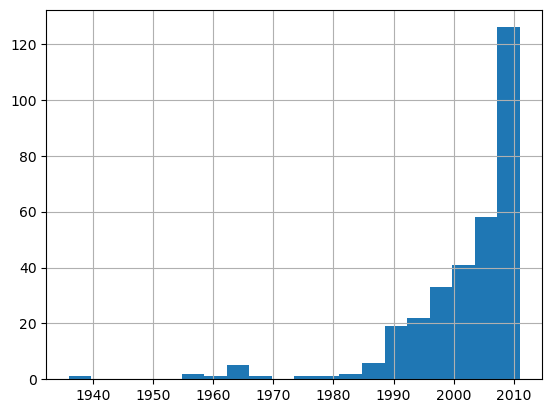

In [6]:
ab_reduced_noNaN['Pub year'].hist(bins=20)

4) Number of Pages Analysis:

<Axes: >

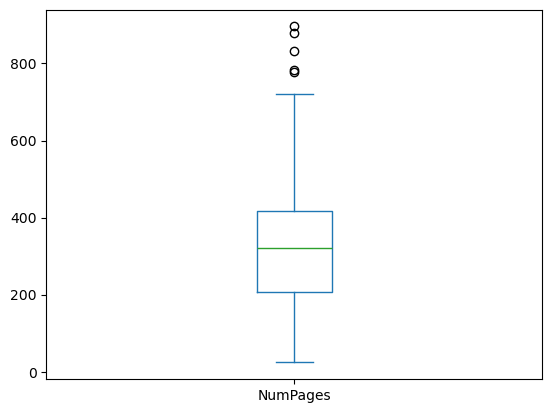

In [7]:
ab_reduced_noNaN['NumPages'].plot(kind='box')

Summary and link:
Preprocessing the Amazon Books Dataset
We started by reviewing the steps needed to clean and preprocess the Amazon books dataset, aiming to prepare it for further analysis. The steps we covered included:

Removing Unnecessary Columns: We removed the columns Weight_oz, Width, and Height to focus on relevant features in the dataset.
Dropping Rows with NaN Values: We eliminated any rows that contained NaN values to ensure we only work with complete data.
Data Type Conversion:
Converted Pub year and NumPages columns to integers.
Converted Hard_or_Paper to a categorical type, as it represents discrete categories.
Handling the SettingWithCopyWarning
When we encountered SettingWithCopyWarning messages, which occurred due to modifying a subset of the DataFrame (a "view") rather than the original data, we applied a few techniques to resolve the warning:

We used .copy() on the DataFrame subset to create an independent copy before modifying it.
We used .loc for column-wise indexing, ensuring that the modifications are applied directly to the intended DataFrame.
Exploratory Data Analysis (EDA) Steps
After preprocessing, we suggested some basic EDA techniques to better understand the dataset:

Summary Statistics: Using describe() to get an overview of numerical data.
Class Distribution: Checking the distribution of Hard_or_Paper values to understand book format trends.
Year Distribution: Plotting a histogram of Pub year to analyze publication trends over time.
Page Count Analysis: Using box plots to observe the distribution of NumPages, identifying any outliers.
These preprocessing and EDA steps should give a clean, analyzable dataset and initial insights into the Amazon books data.



Question 4:

I use the train_test_split function to create an 80/20 train-test split.

In [2]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Pre-processing: Drop specified columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop all rows with NaN entries
ab_reduced_noNaN = ab_reduced.dropna()

# Convert 'Pub year' and 'NumPages' to integers, and 'Hard_or_Paper' to a categorical type
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Confirm the dataset is properly processed
print("Shape of pre-processed dataset:", ab_reduced_noNaN.shape)
print("Column types:\n", ab_reduced_noNaN.dtypes)

# Define features and target for modeling
X = ab_reduced_noNaN[['List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Perform the 80/20 train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Report the sizes of the training and testing datasets
print(f"Training dataset size: {len(X_train)} observations")
print(f"Testing dataset size: {len(X_test)} observations")

Shape of pre-processed dataset: (319, 10)
Column types:
 Title              object
Author             object
List Price        float64
Amazon Price      float64
Hard_or_Paper    category
NumPages            int64
Publisher          object
Pub year            int64
ISBN-10            object
Thick             float64
dtype: object
Training dataset size: 255 observations
Testing dataset size: 64 observations


/tmp/ipykernel_53/61693834.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_53/61693834.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_53/61693834.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

What does the following two step do?
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

Step 1: Fitting the Model (fit())

This step make a Decision Tree by finding the best splits in the data.
The model uses the feature to recursively divide the data into groups that are increasingly homogeneous with respect to the target variable.
The max_depth=2 parameter limits the tree to two levels of splits, preventing it from overfitting.

Step 2: Plotting the Decision Tree (tree.plot_tree(clf))

This step represents the structure of the decision tree.
The plot shows decision nodes (splits) and leaf nodes (predictions), along with the conditions used to make splits (e.g., "List Price < X").
From the plot, you can interpret how the tree uses the List Price variable to make predictions.

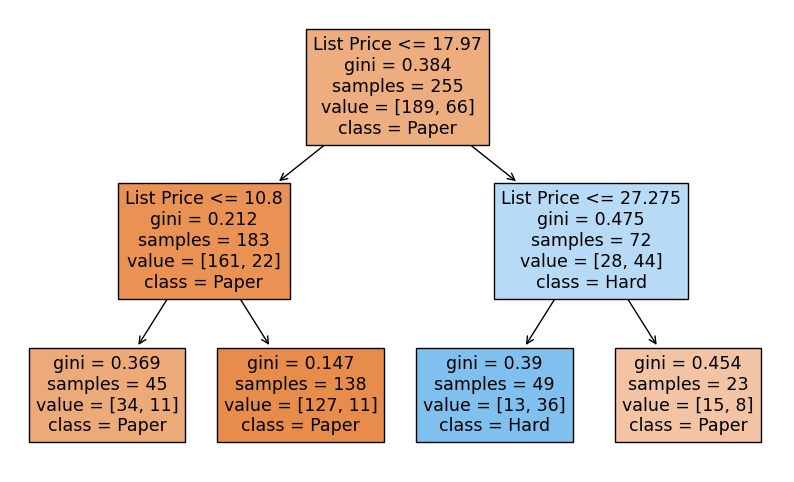

In [3]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# Initialize the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the model using the training data
clf.fit(X_train, y_train)

# Plot the trained decision tree
plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paper', 'Hard'], filled=True)
plt.show()

Explanation of the Decision Tree Predictions:

The decision tree splits the data into multiple parts based on the List Price feature: 
- Each node represents a condition
- The leaf nodes represent predictions: hardcover or paperback.
By visualizing the tree, we know:
- Thresholds for List Price that the model considers important.
- the numbers of samples fall into each decision category.
- Gini impurity: it measures the degree of mix between the two classes.

summary:

Train-Test Split:

Objective: Divide the dataset into training (80%) and testing (20%) sets for model evaluation.
Steps:
Used train_test_split to split the features (List Price) and target (Hard_or_Paper encoded as binary) into training and testing sets.
Reported the sizes of the training and testing datasets to verify the split.
Decision Tree Classifier:

Objective: Train a classification model to predict whether a book is hardcover or paperback based on the List Price.
Steps:
Used DecisionTreeClassifier from scikit-learn with a maximum depth of 2 to prevent overfitting.
Trained the classifier using the training data.
Visualized the decision tree using tree.plot_tree, showing how the model splits the List Price feature to make predictions.
Metric Explanation and Model Interpretation:

ChatBot Guidance: Explained the purpose of key steps:
fit(): Used to train the model on the data by finding optimal splits based on the feature(s).
plot_tree(): Visualizes the decision tree, showing the splits, conditions, and leaf nodes (predictions).
Discussed how the tree uses thresholds in List Price to classify books as hardcover or paperback.

link: https://chatgpt.com/share/673ff55f-abfc-8013-b2fb-8e7cab5032a0

Question 6:

In [11]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]  # Features for clf2
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target variable (Hard or Paper)

# Split the dataset into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of training and test data
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (255, 3) (255,)
Test set shape: (64, 3) (64,)


In [12]:
from sklearn.tree import DecisionTreeClassifier

# Train clf using only List Price feature
X_train_clf = X_train[['List Price']]
X_test_clf = X_test[['List Price']]

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train_clf, y_train)

# Train clf2 using NumPages, Thick, and List Price features
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [13]:
from sklearn.metrics import confusion_matrix

# Predict on the test set using both classifiers
y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test)

# Generate confusion matrices
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf)
conf_matrix_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Print confusion matrices
print("Confusion matrix for clf (Decision Tree with List Price):")
print(conf_matrix_clf)

print("Confusion matrix for clf2 (Decision Tree with NumPages, Thick, List Price):")
print(conf_matrix_clf2)

Confusion matrix for clf (Decision Tree with List Price):
[[40  4]
 [ 6 14]]
Confusion matrix for clf2 (Decision Tree with NumPages, Thick, List Price):
[[40  4]
 [ 5 15]]


In [14]:
# Function to calculate sensitivity, specificity, and accuracy from confusion matrix
def calculate_metrics(conf_matrix):
    TP = conf_matrix[1, 1]  # True Positives
    FP = conf_matrix[0, 1]  # False Positives
    TN = conf_matrix[0, 0]  # True Negatives
    FN = conf_matrix[1, 0]  # False Negatives
    
    sensitivity = TP / (TP + FN)  # True Positive Rate
    specificity = TN / (TN + FP)  # True Negative Rate
    accuracy = (TP + TN) / (TP + TN + FP + FN)  # Overall accuracy
    
    return sensitivity, specificity, accuracy

# Calculate metrics for clf
sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(conf_matrix_clf)

# Calculate metrics for clf2
sensitivity_clf2, specificity_clf2, accuracy_clf2 = calculate_metrics(conf_matrix_clf2)

# Report the results for both models
print("\nMetrics for clf (Decision Tree with List Price only):")
print(f"Sensitivity: {sensitivity_clf:.4f}")
print(f"Specificity: {specificity_clf:.4f}")
print(f"Accuracy: {accuracy_clf:.4f}")

print("\nMetrics for clf2 (Decision Tree with NumPages, Thick, List Price):")
print(f"Sensitivity: {sensitivity_clf2:.4f}")
print(f"Specificity: {specificity_clf2:.4f}")
print(f"Accuracy: {accuracy_clf2:.4f}")



Metrics for clf (Decision Tree with List Price only):
Sensitivity: 0.7000
Specificity: 0.9091
Accuracy: 0.8438

Metrics for clf2 (Decision Tree with NumPages, Thick, List Price):
Sensitivity: 0.7500
Specificity: 0.9091
Accuracy: 0.8594


Summary:

Objective:
We created confusion matrices for two decision tree models (clf and clf2) using the test data (ab_reduced_noNaN_test). We then calculated and reported their sensitivity, specificity, and accuracy.

Steps:
Data Split: The dataset was split into training and testing sets with an 80/20 ratio using train_test_split. The features used for training the models were:

clf: Trained with only the List Price feature.
clf2: Trained with the NumPages, Thick, and List Price features.
Model Training:

clf was trained with a maximum depth of 2, based on the List Price.
clf2 was trained with a maximum depth of 4, based on multiple features (NumPages, Thick, and List Price).
Confusion Matrices: The confusion matrices for both models were computed on the test set (X_test) and the results were displayed.

Performance Metrics: For each model, we calculated:

Sensitivity: The proportion of correctly predicted positive cases (e.g., hardcover books).
Specificity: The proportion of correctly predicted negative cases (e.g., paperback books).
Accuracy: The overall proportion of correct predictions.
Conclusion:

Link:
https://chatgpt.com/share/673ffe80-b534-8013-8fc9-c6334cf0f4a8

Question 7:

In the first case, the model (clf) is trained using only the 'List Price' feature, while in the second case, it uses three features: 'NumPages', 'Thick', and 'List Price'. The addition of more features in the second model provides additional information for the classifier, which leading to more accurate predictions. This be reflected in the confusion matrix (with possibly fewer false positives and false negatives).
The two confusion matrices for clf and clf2 are likely to be better because they are based on a more controlled and specific evaluation with clearly defined training and test sets. The test set is separate from the training set, allowing for a more realistic estimate of how well the model generalizes to new data. This split helps to reduce the risk of overfitting, which might occur in the case of the first two matrices where both training data and predictions are being used together.

summary: 

The differences in the confusion matrices for two models, clf and clf2, arise from the features used in the models and the proper handling of training and testing data.

Features:

In clf, only the 'List Price' feature is used, which may limit the model’s ability to make accurate predictions.
In clf2, three features—'NumPages', 'Thick', and 'List Price'—are used. The addition of these features provides the model with more information, potentially improving prediction accuracy and leading to a more reliable confusion matrix with fewer misclassifications.
Training and Testing Data:

The use of a separate test set, distinct from the training data, ensures a more realistic evaluation of model performance. This helps to avoid overfitting, where a model performs well on training data but poorly on new, unseen data.
Impact on the Confusion Matrix:

The inclusion of more features and the correct training/testing split likely reduce errors such as false positives and false negatives. As a result, the confusion matrix for clf2 (with more features and a separate test set) is likely to show improved performance compared to clf, which may have overfitted or lacked sufficient features.

link: https://chatgpt.com/share/673ffe16-7754-8013-8db4-d6020135ce50